# Double Jet

Example how to set up dj with KL model error on a very fine resolution

In [1]:
from gpuocean.SWEsimulators import ModelErrorKL, CDKLM16
from gpuocean.utils import Common, IPythonMagic

from importlib import reload

import numpy as np
import pycuda.driver as cuda
from matplotlib import pyplot as plt

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

plt.rcParams["image.origin"] = "lower"


In [2]:
%cuda_context_handler gpu_ctx

In [3]:
gpu_stream = cuda.Stream()

In [4]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))
from utils.BasinInit import *

Get initial arguments from class

In [5]:
from gpuocean.utils import DoubleJetCase

In [6]:
doubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, DoubleJetCase.DoubleJetPerturbationType.SteadyState, ny=1024, nx=2048)

In [7]:
doubleJetCase_args, doubleJetCase_init = doubleJetCase.getInitConditions()
doubleJetCase_args["dt"] = 0.0

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

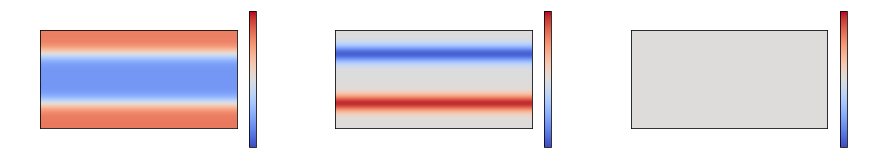

In [9]:
from utils.DoubleJetPlot import *
imshow3(list(doubleJetCase_init.values()), eta_vlim=3.5, huv_vlim=750)

Prepare KL model error

Strong perturbations! Then we dont need to run simulation for long before we see chaos

In [10]:
grid_args = {"nx" : doubleJetCase_args["nx"],
             "ny" : doubleJetCase_args["ny"],
             "dx" : doubleJetCase_args["dx"],
             "dy" : doubleJetCase_args["dy"],
             "gpu_ctx" : doubleJetCase_args["gpu_ctx"],
             "gpu_stream": gpu_stream,
             "boundary_conditions" : doubleJetCase_args["boundary_conditions"]
             }

sim_model_error_basis_args = {
                            "basis_x_start": 2, 
                            "basis_x_end": 8,
                            "basis_y_start": 1,
                            "basis_y_end": 7,

                            "kl_decay": 1.25,
                            "kl_scaling": 0.025,
                            }

sim_mekl = ModelErrorKL.ModelErrorKL(**grid_args, **sim_model_error_basis_args)

In [11]:
sim_model_error_time_step = 60.0

Define DoubleJet sim

In [12]:
sim = CDKLM16.CDKLM16(**doubleJetCase_args, **doubleJetCase_init)
sim.model_error = sim_mekl
sim.model_time_step = sim_model_error_time_step

In [13]:
sim.dataAssimilationStep(6*60*60)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

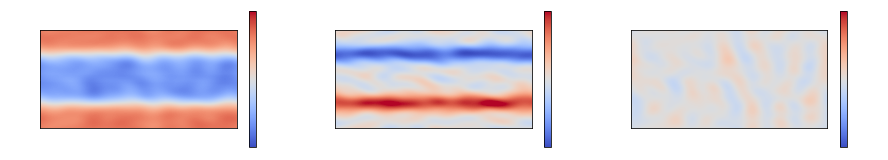

In [14]:
imshowSim(sim, eta_vlim=3.5, huv_vlim=750)

In [15]:
sim.dataAssimilationStep(12*60*60)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

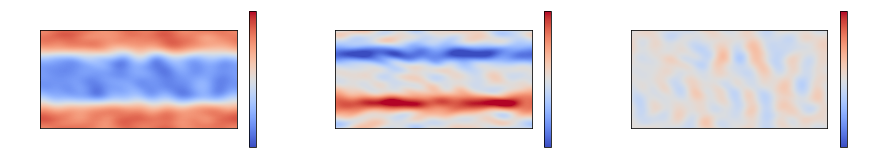

In [16]:
imshowSim(sim, eta_vlim=3.5, huv_vlim=750)

In [17]:
sim.dataAssimilationStep(18*60*60)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

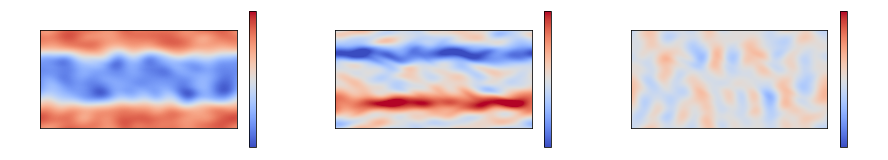

In [18]:
imshowSim(sim, eta_vlim=3.5, huv_vlim=750)

In [19]:
sim.dataAssimilationStep(24*60*60)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

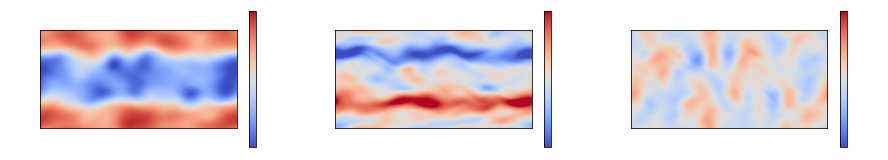

In [20]:
imshowSim(sim, eta_vlim=3.5, huv_vlim=750)